# Lab: Logistic Regression, LDA, QDA, and KNN 

In [11]:
%matplotlib inline

import pandas as pd
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Stock Market Data 

In [4]:
smarket_df = pd.read_csv('../data/Smarket.csv')
smarket_df.drop('Unnamed: 0', inplace=True, axis=1)
smarket_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
smarket_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
smarket_df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


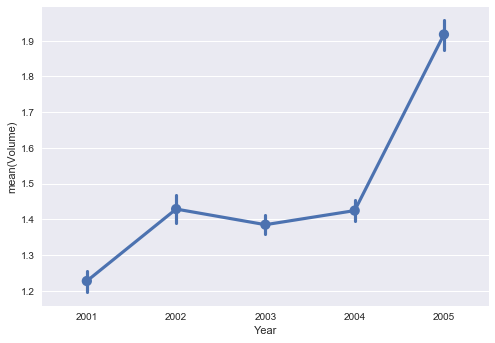

In [14]:
ax = sns.pointplot(x="Year", y="Volume", data=smarket_df)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif

X = smarket_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = np.ravel(smarket_df['Direction'])
log_model = LogisticRegression()
log_model.fit(X, y)



# printing out intercept, coefficients and p-values
names = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
f_statistics, p_values = f_classif(X, y)

print("Intercpet: {}".format(log_model.intercept_))
print('Coefficients:')
for i in range(0, len(features)):
    print("\t{}: {}".format(names[i], log_model.coef_[0][i]))
print('p-values:')
for i in range(0, len(features)):
    print("\t {}: {}".format(names[i], p_values[i]))

Intercpet: [-0.11454962]
Coefficients:
	Lag1: -0.07279035244097605
	Lag2: -0.042291015688171354
	Lag3: 0.01095799639819893
	Lag4: 0.00921799170450773
	Lag5: 0.010230310971632023
	Volume: 0.12793930878661286
p-values:
	 Lag1: 0.16008618568035235
	 Lag2: 0.39494704292074356
	 Lag3: 0.8285459051313201
	 Lag4: 0.8816470639628737
	 Lag5: 0.8481132399931779
	 Volume: 0.417518499939722


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

prediction_probabilities = log_model.predict_proba(X)
predicted_direction = list()
for prediction in prediction_probabilities:
    if prediction[0] > .5:
        predicted_direction.append('Down')
    else:
        predicted_direction.append('Up')
print(confusion_matrix(y, np.asarray(predicted_direction)))

             precision    recall  f1-score   support

       Down       0.51      0.24      0.33       602
         Up       0.53      0.79      0.63       648

avg / total       0.52      0.52      0.48      1250



In [97]:
log_model2 = LogisticRegression()

train_X = smarket_df[smarket_df.Year < 2005][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
train_y = np.ravel(smarket_df[smarket_df.Year < 2005]['Direction'])
test_X = smarket_df[smarket_df.Year == 2005][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
test_y = np.ravel(smarket_df[smarket_df.Year == 2005]['Direction'])

log_model2.fit(train_X, train_y)

prediction_probabilities = log_model.predict_proba(test_X)
predicted_direction = list()
for prediction in prediction_probabilities:
    if prediction[0] > .5:
        predicted_direction.append('Down')
    else:
        predicted_direction.append('Up')
print(classification_report(test_y, np.asarray(predicted_direction)))

             precision    recall  f1-score   support

       Down       0.80      0.04      0.07       111
         Up       0.57      0.99      0.72       141

avg / total       0.67      0.57      0.43       252



In [101]:
log_model3 = LogisticRegression()

train_X = smarket_df[smarket_df.Year < 2005][['Lag1', 'Lag2']]
train_y = np.ravel(smarket_df[smarket_df.Year < 2005]['Direction'])
test_X = smarket_df[smarket_df.Year == 2005][['Lag1', 'Lag2']]
test_y = np.ravel(smarket_df[smarket_df.Year == 2005]['Direction'])

log_model3.fit(train_X, train_y)

prediction_probabilities = log_model3.predict_proba(test_X)
predictions = log_model3.predict(test_X)
predicted_direction = list()
for prediction in prediction_probabilities:
    if prediction[0] > .5:
        predicted_direction.append('Down')
    else:
        predicted_direction.append('Up')
print(accuracy_score(test_y, np.asarray(predictions)))

0.559523809524


## Linear Discriminant Analysis

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

features = ['Lag1', 'Lag2']

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(train_X, train_y)

print('Prior Probabilities of groups:')
for i in range(0, len(lda_model.classes_)):
    print('\t{}:{}'.format(lda_model.classes_[i], lda_model.priors_[i]))
    
print('Group means:')
for i in range (0, len(lda_model.classes_)):
    for j in range(0, len(features)):
        print('\t{}, {}: {}'.format(lda_model.classes_[i],
                                     features[j],
                                     lda_model.means_[i][j]))
print('Coefficients:')
for i in range(0, lda_model.coef_.shape[1]):
    print('\t{}:{}'.format(features[i], lda_model.coef_[0][i]))

Prior Probabilities of groups:
	Down:0.49198396793587174
	Up:0.5080160320641283
Group means:
	Down, Lag1: 0.04279022403258651
	Down, Lag2: 0.0338940936863544
	Up, Lag1: -0.03954635108481257
	Up, Lag2: -0.031325443786982286
Coefficients:
	Lag1:-0.05544077817925726
	Lag2:-0.044345199897942424


In [108]:
predictions = lda_model.predict(test_X)

print(confusion_matrix(test_y, np.asarray(predictions)).transpose())
print(accuracy_score(test_y, np.asarray(predictions)))

[[ 35  35]
 [ 76 106]]
0.559523809524


## Quadratic Discriminant Analysis 

In [102]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_X, train_y)

print('Prior Probabilities of groups:')
for i in range(0, len(qda_model.classes_)):
    print('\t{}:{}'.format(qda_model.classes_[i], qda_model.priors_[i]))
    
print('Group means:')
for i in range (0, len(qda_model.classes_)):
    for j in range(0, len(features)):
        print('\t{}, {}: {}'.format(qda_model.classes_[i],
                                     features[j],
                                     qda_model.means_[i][j]))

Prior Probabilities of groups:
	Down:0.49198396793587174
	Up:0.5080160320641283
Group means:
	Down, Lag1: 0.04279022403258651
	Down, Lag2: 0.0338940936863544
	Up, Lag1: -0.03954635108481257
	Up, Lag2: -0.031325443786982286


In [107]:
predictions = qda_model.predict(test_X)

print(confusion_matrix(test_y, np.asarray(predictions)).transpose())
print(accuracy_score(test_y, np.asarray(predictions)))

[[ 30  20]
 [ 81 121]]
0.599206349206


## K-Nearest Neighbors

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn_classif = KNeighborsClassifier(n_neighbors=1)
knn_classif.fit(train_X, train_y)
predictions = knn_classif.predict(test_X)

print(confusion_matrix(test_y, np.asarray(predictions)).transpose())
print(accuracy_score(test_y, np.asarray(predictions)))

[[43 58]
 [68 83]]
0.5


In [110]:
knn_classif = KNeighborsClassifier(n_neighbors=3)
knn_classif.fit(train_X, train_y)
predictions = knn_classif.predict(test_X)

print(confusion_matrix(test_y, np.asarray(predictions)).transpose())
print(accuracy_score(test_y, np.asarray(predictions)))

[[48 55]
 [63 86]]
0.531746031746


## An Application to Caravan Insurance Data 

In [111]:
caravan_df = pd.read_csv('../data/Caravan.csv')
caravan_df.drop('Unnamed: 0', inplace=True, axis=1)
print(caravan_df.shape)
print(caravan_df['Purchase'].value_counts())

(5822, 86)
No     5474
Yes     348
Name: Purchase, dtype: int64


In [121]:
from sklearn.preprocessing import MinMaxScaler

caravan_nums_df = caravan_df.drop('Purchase', axis=1)
responses = np.ravel(caravan_df['Purchase'])

caravan_nums_df = (caravan_nums_df - caravan_nums_df.mean())/caravan_nums_df.std()
caravan_nums_df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,...,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03
mean,-8.238000e-17,-1.983222e-16,-1.482840e-16,2.096113e-16,-5.675067e-17,-6.285289e-17,8.787200e-17,-3.478267e-17,1.122809e-16,-1.696418e-16,...,1.006867e-17,-6.102222e-18,3.539289e-17,-9.763555e-18,-1.232649e-16,5.492000e-18,3.295200e-17,1.952711e-17,2.440889e-18,-5.186889e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.810063e+00,-2.725565e-01,-2.125514e+00,-2.444473e+00,-1.670990e+00,-6.942510e-01,-2.696595e+00,-1.051503e+00,-2.039564e+00,-3.238282e+00,...,-2.028925e-01,-7.315883e-02,-8.104764e-02,-5.991487e-02,-1.014271e+00,-2.270383e-02,-7.364394e-02,-1.506075e-01,-8.734022e-02,-1.188063e-01
25%,-1.109495e+00,-2.725565e-01,-8.594262e-01,-1.216859e+00,-9.708962e-01,-6.942510e-01,-3.653787e-01,-1.051503e+00,-7.877226e-01,-6.197711e-01,...,-2.028925e-01,-7.315883e-02,-8.104764e-02,-5.991487e-02,-1.014271e+00,-2.270383e-02,-7.364394e-02,-1.506075e-01,-8.734022e-02,-1.188063e-01
50%,4.473248e-01,-2.725565e-01,4.066617e-01,1.075374e-02,4.292915e-01,-6.942510e-01,2.174254e-01,-6.870474e-02,-1.618019e-01,-9.606902e-02,...,-2.028925e-01,-7.315883e-02,-8.104764e-02,-5.991487e-02,7.649050e-01,-2.270383e-02,-7.364394e-02,-1.506075e-01,-8.734022e-02,-1.188063e-01
75%,8.365297e-01,-2.725565e-01,4.066617e-01,1.075374e-02,7.793384e-01,3.025256e-01,8.002294e-01,9.140938e-01,4.641188e-01,4.276331e-01,...,-2.028925e-01,-7.315883e-02,-8.104764e-02,-5.991487e-02,7.649050e-01,-2.270383e-02,-7.364394e-02,-1.506075e-01,-8.734022e-02,-1.188063e-01
max,1.303575e+00,2.190356e+01,2.938838e+00,3.693593e+00,1.479432e+00,8.276739e+00,2.548642e+00,3.862489e+00,3.593722e+00,1.475037e+00,...,2.098527e+01,1.366654e+01,1.233630e+01,2.577893e+01,1.143996e+01,4.403786e+01,2.442664e+01,1.406837e+01,2.202113e+01,1.654842e+01


In [132]:
train_X = caravan_nums_df[:1000]
train_y = responses[:1000]
test_X =caravan_nums_df[1000:]
test_y = responses[1000:]

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_X, train_y)
predicted = np.ravel(knn_model.predict(test_X))

print(1 - accuracy_score(test_y, np.asarray(predicted)))

0.110949813355


In [138]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
predicted = np.ravel(knn_model.predict(test_X))

print(1 - accuracy_score(test_y, np.asarray(predicted)))
print(confusion_matrix(test_y, np.asarray(predicted).transpose()))
print(classification_report(test_y, np.asarray(predicted).transpose()))

0.0746578183326
[[4437   96]
 [ 264   25]]
             precision    recall  f1-score   support

         No       0.94      0.98      0.96      4533
        Yes       0.21      0.09      0.12       289

avg / total       0.90      0.93      0.91      4822



In [139]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
predicted = knn_model.predict(test_X)

print(1 - accuracy_score(test_y, np.asarray(predicted)))
print(confusion_matrix(test_y, np.asarray(predicted).transpose()))
print(classification_report(test_y, np.asarray(predicted).transpose()))

0.0634591455827
[[4506   27]
 [ 279   10]]
             precision    recall  f1-score   support

         No       0.94      0.99      0.97      4533
        Yes       0.27      0.03      0.06       289

avg / total       0.90      0.94      0.91      4822

